## Module Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve # Removed 'score'
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

## Data Loading

In [15]:
df = pd.read_excel('/content/Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
df.shape

(7043, 33)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [16]:
df.drop(columns=['CustomerID'], inplace=True)

In [17]:
df.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [18]:
df.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [19]:
df['Country'].value_counts()

,count
Country,
United States,7043


In [21]:
df['Gender'].value_counts()

,count
Gender,
Male,3555
Female,3488


In [23]:
df['Senior Citizen'].value_counts()

,count
Senior Citizen,
No,5901
Yes,1142


In [33]:
for col in df.columns:
  if col not in ['Total Charges', 'Monthly Charges', 'Total Charges', 'Tenure Months']:
    print(f'{col}  : {df[col].unique()}')
    print("####################################")

Count  : [1]
####################################
Country  : ['United States']
####################################
State  : ['California']
####################################
City  : ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
####################################
Zip Code  : [90003 90005 90006 ... 96128 96134 96146]
####################################
Lat Long  : ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
####################################
Latitude  : [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
####################################
Longitude  : [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
####################################
Gender  : ['Male' 'Female']
####################################
Senior Citizen  : ['No' 'Yes']
####################################
Partner  :

In [25]:
df.isnull().sum()

,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0
Senior Citizen,0


In [34]:
for col in ['Total Charges', 'Monthly Charges', 'Tenure Months']:
  print(f'{col}:  {len(df[df[col] == " "])}')
  print("#################################")

Total Charges:  11
#################################
Monthly Charges:  0
#################################
Tenure Months:  0
#################################


In [35]:
df['Total Charges'] = df['Total Charges'].replace({" ": "0.0"}).astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

In [37]:
df['Churn Value'].value_counts()

,count
Churn Value,
0,5174
1,1869


In [40]:
df['Churn Label'].value_counts()

,count
Churn Label,
No,5174
Yes,1869


In [41]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [42]:
def plot_distribution(df, col_name):
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  sns.histplot(df[col_name], kde=True)
  plt.title(f'Distribution of {col_name}')

  col_meean = df[col_name].mean()
  col_median = df[col_name].median()

  plt.axvline(col_meean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {col_meean:.2f}')
  plt.axvline(col_median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {col_median:.2f}')

  plt.legend()
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df[col_name])
  plt.title(f'Box Plot of {col_name}')
  plt.show()

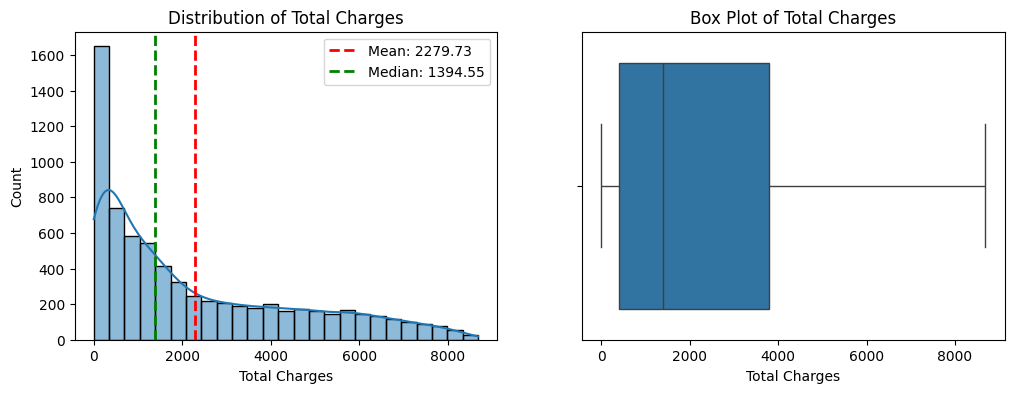

In [43]:
plot_distribution(df, 'Total Charges')

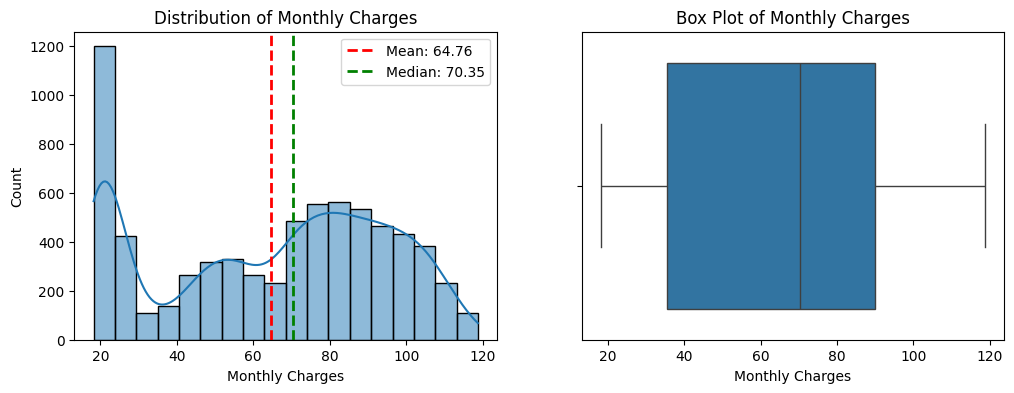

In [44]:
plot_distribution(df, "Monthly Charges")

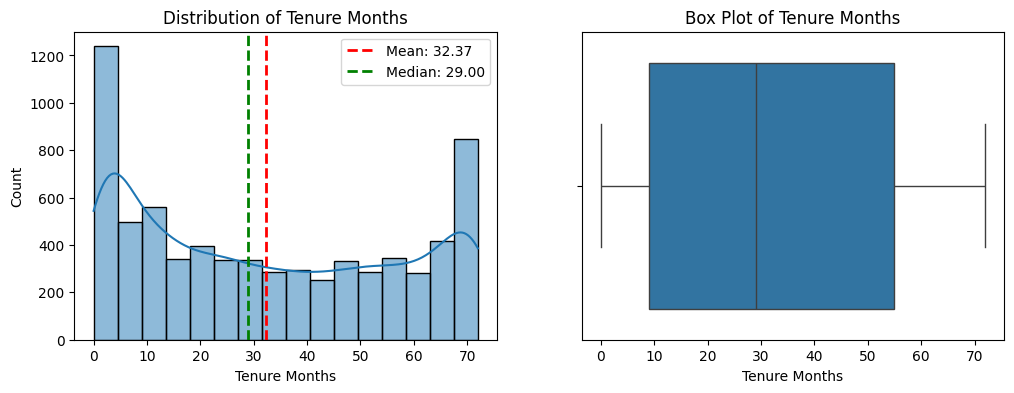

In [45]:
plot_distribution(df, "Tenure Months")

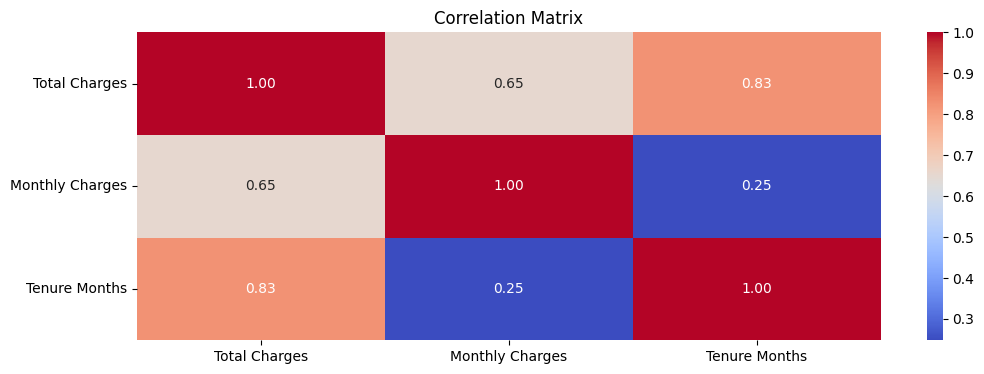

In [47]:
plt.figure(figsize=(12, 4))
sns.heatmap(df[['Total Charges', 'Monthly Charges', 'Tenure Months']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

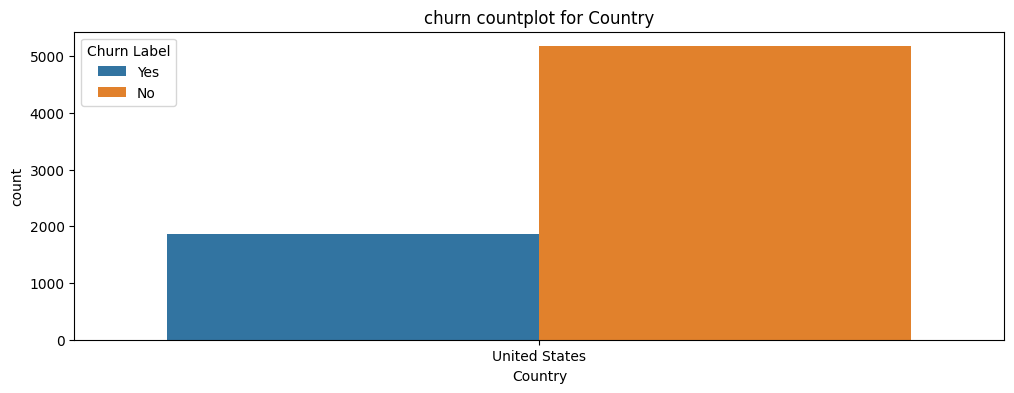

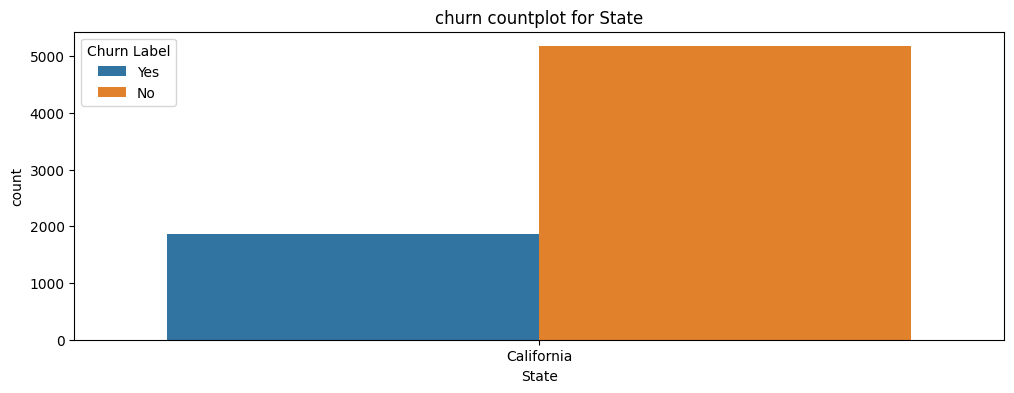

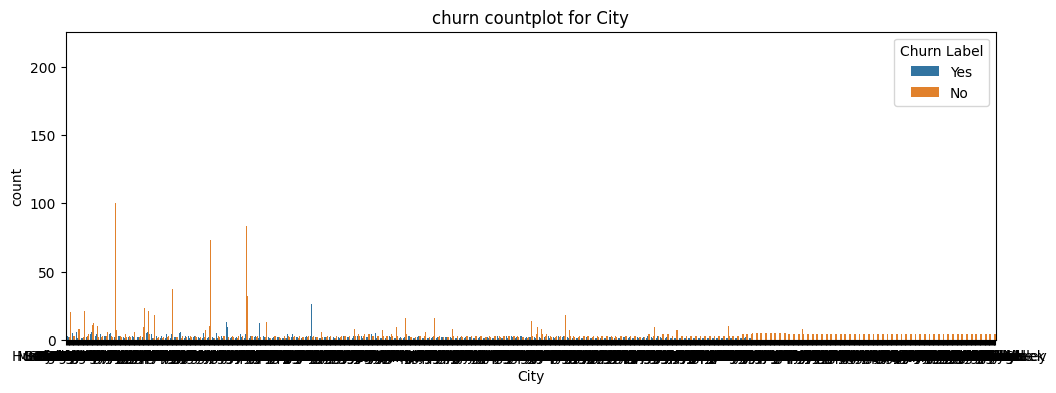

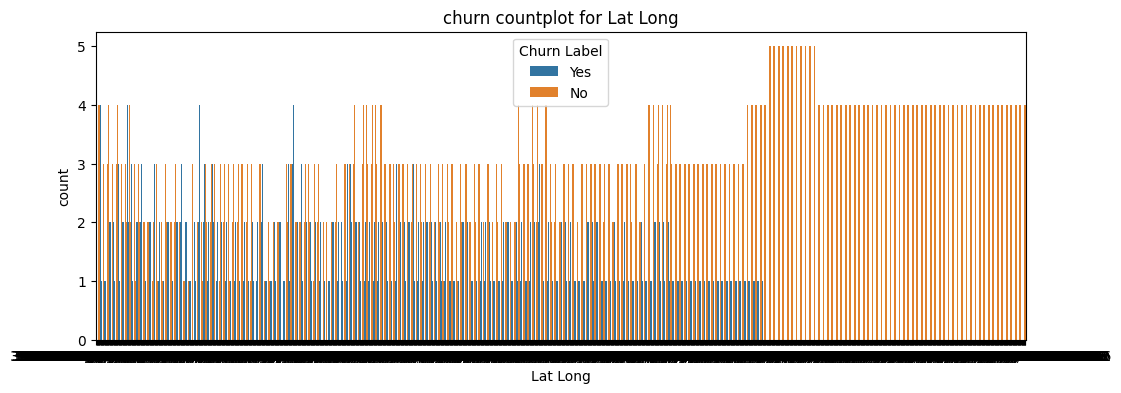

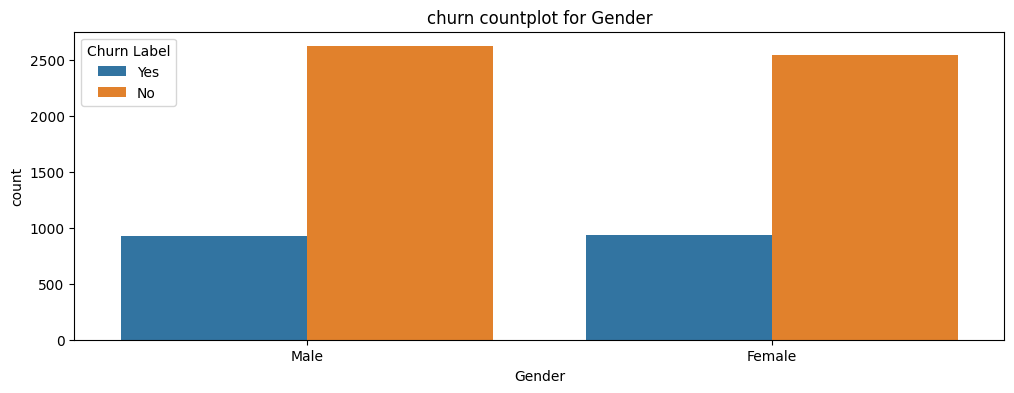

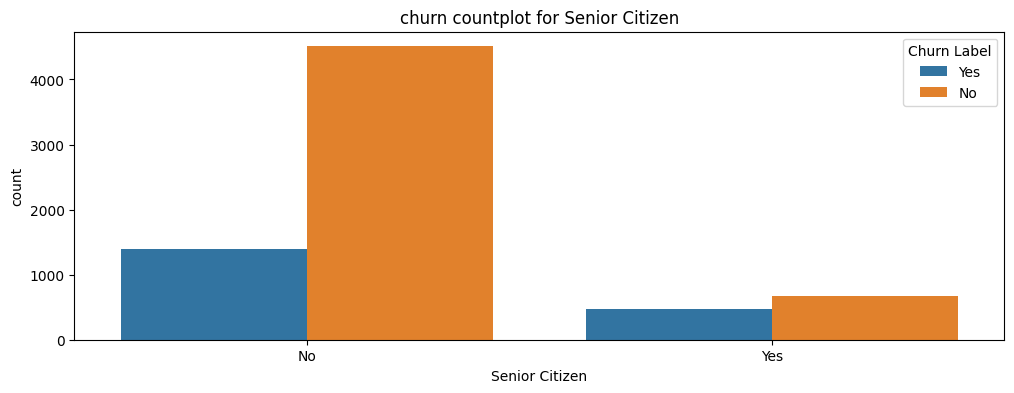

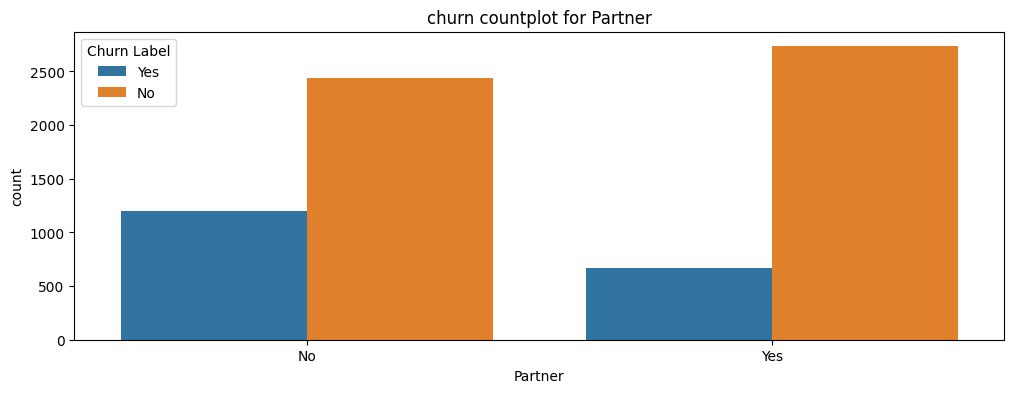

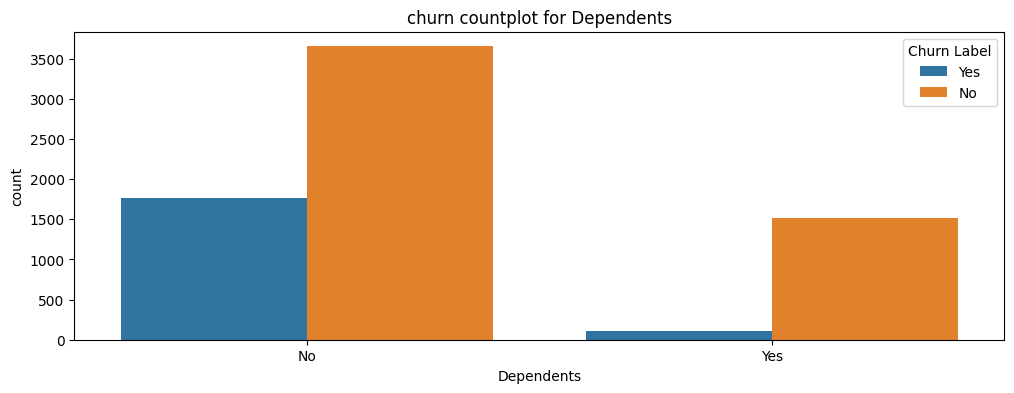

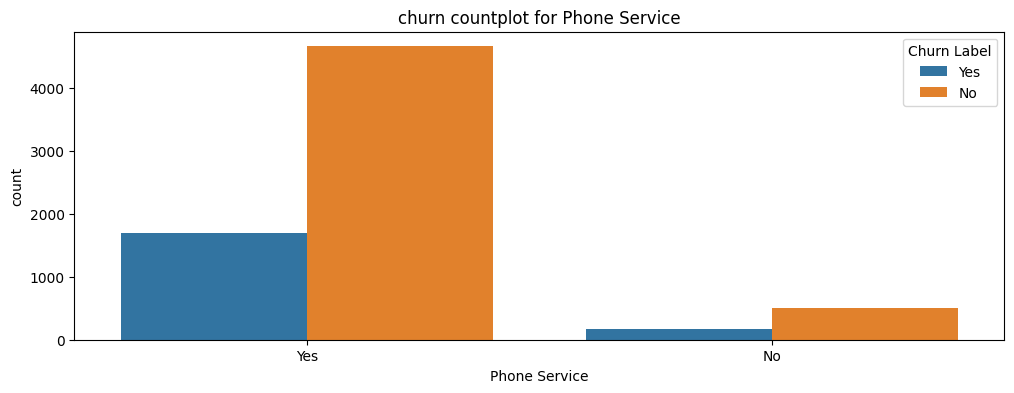

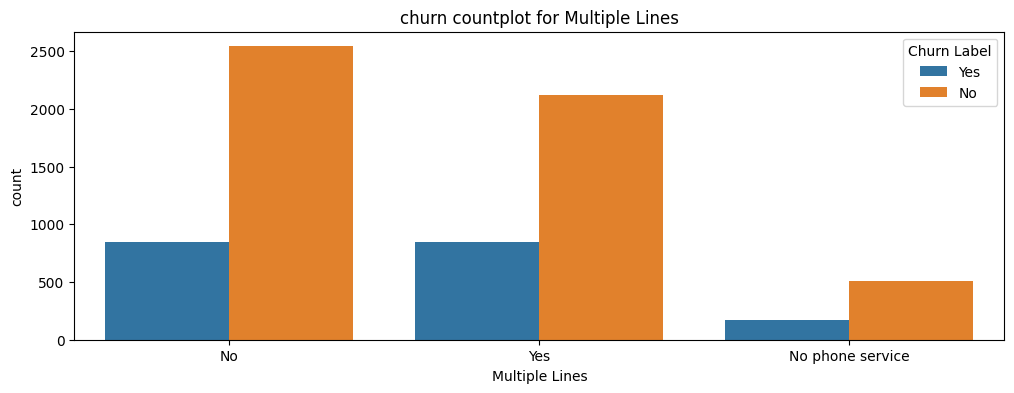

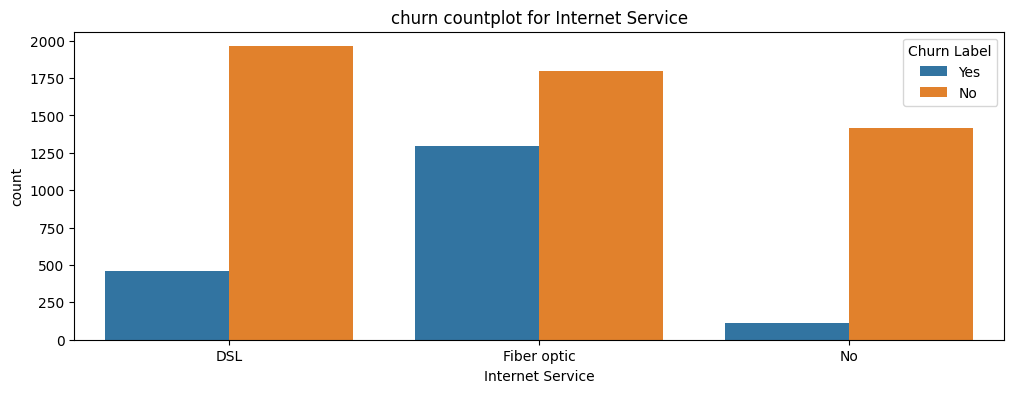

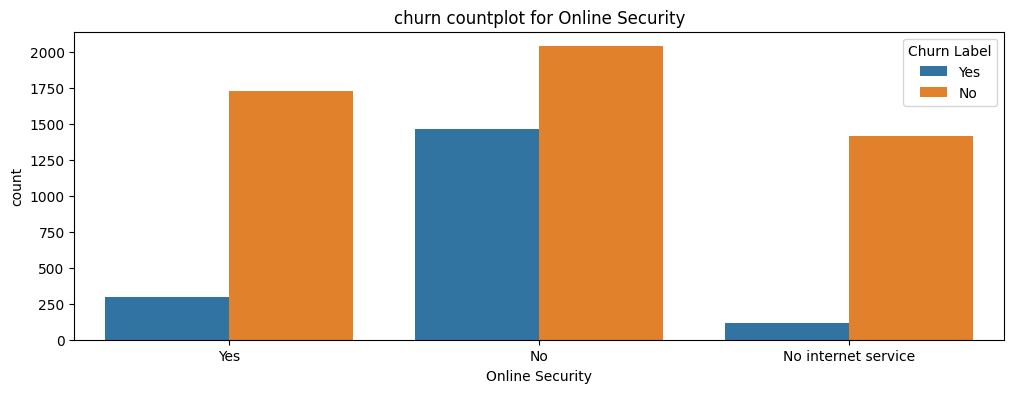

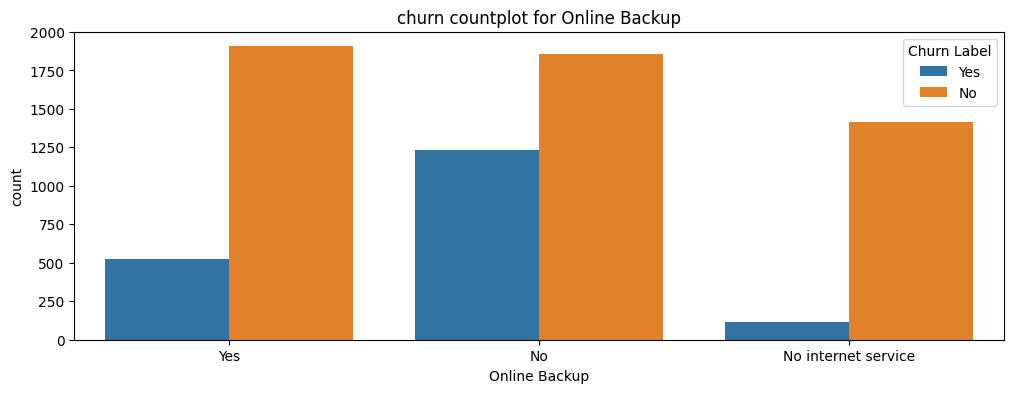

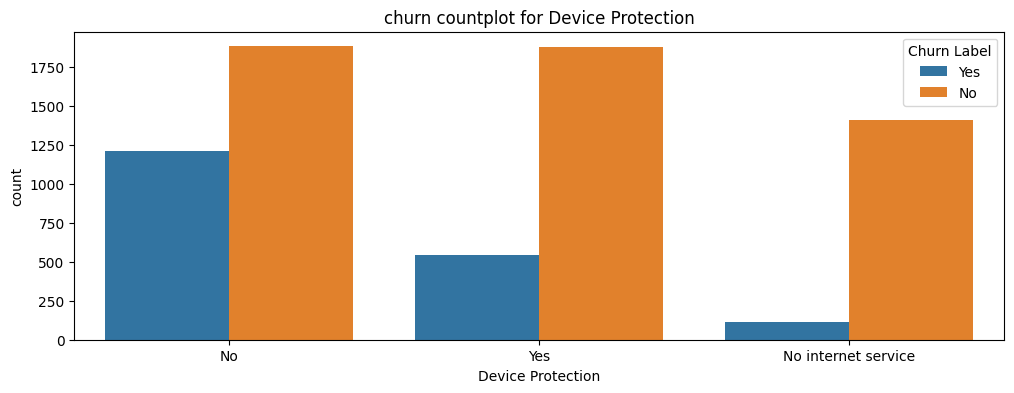

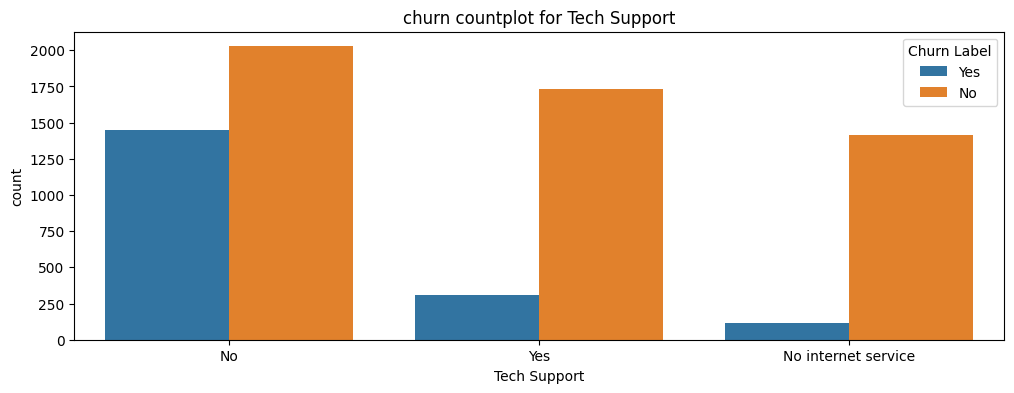

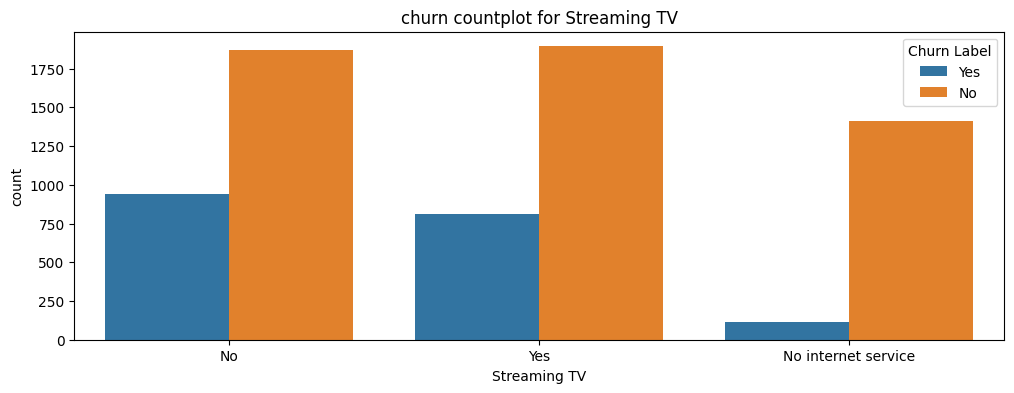

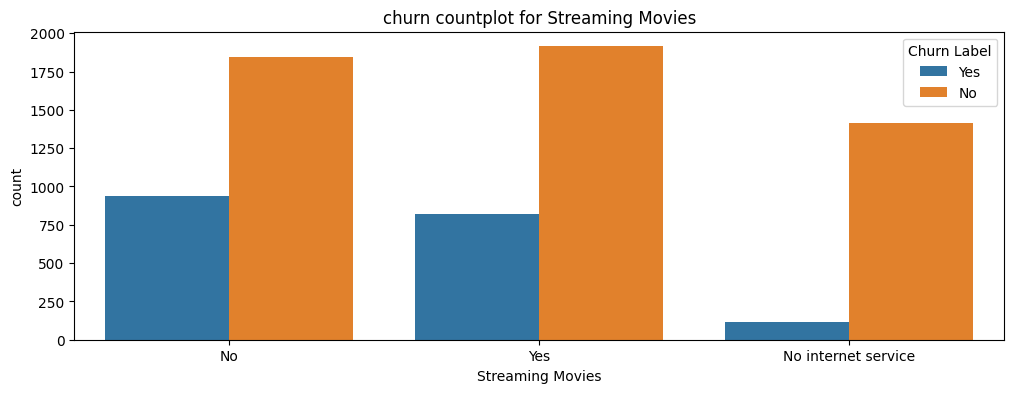

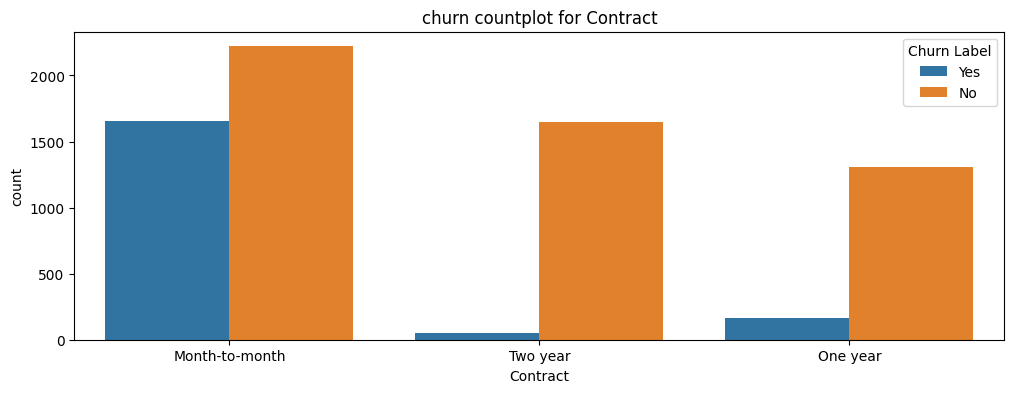

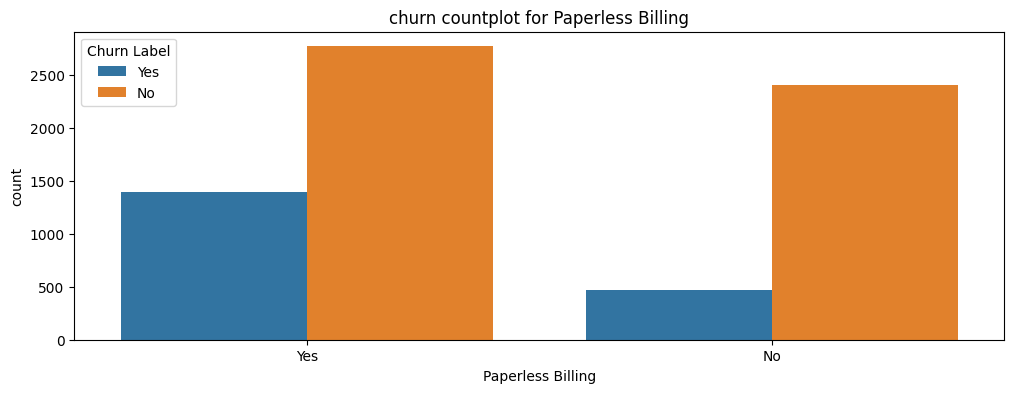

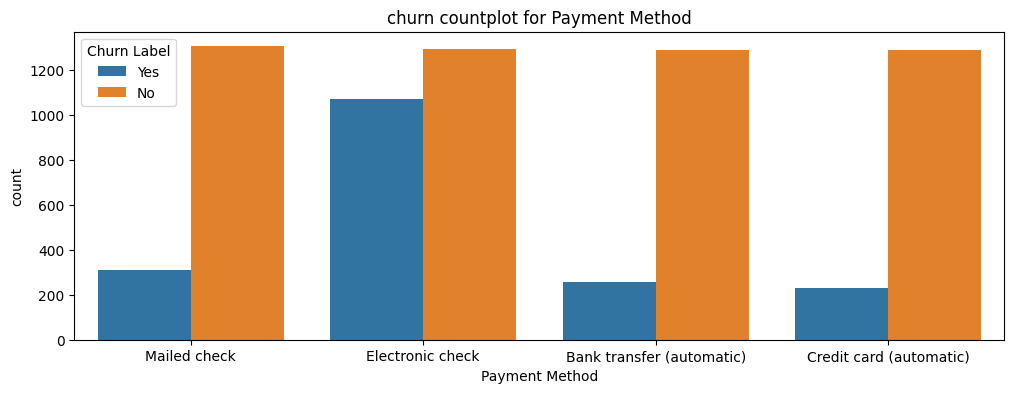

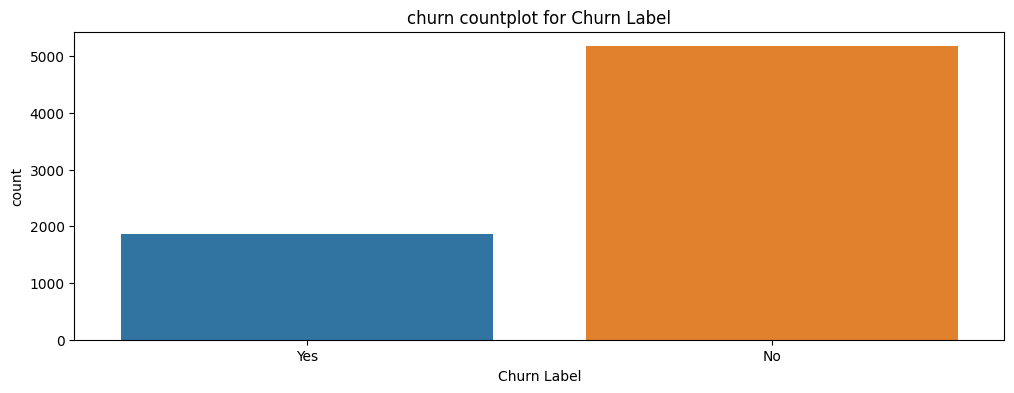

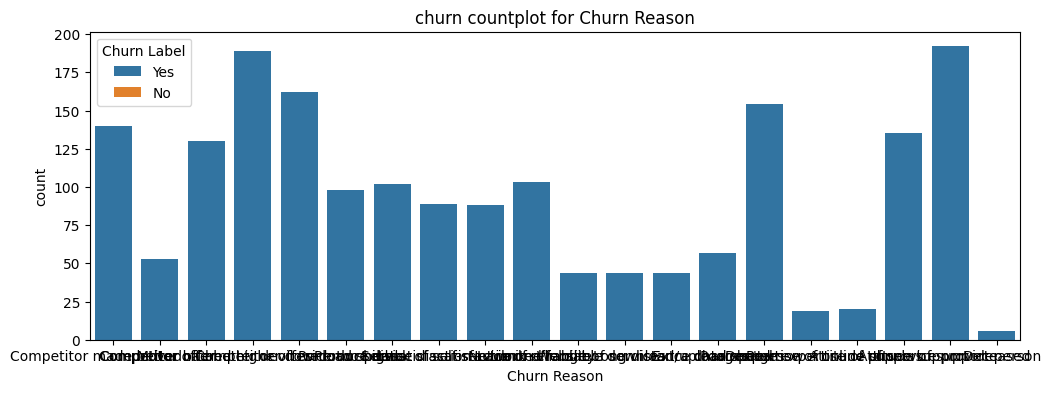

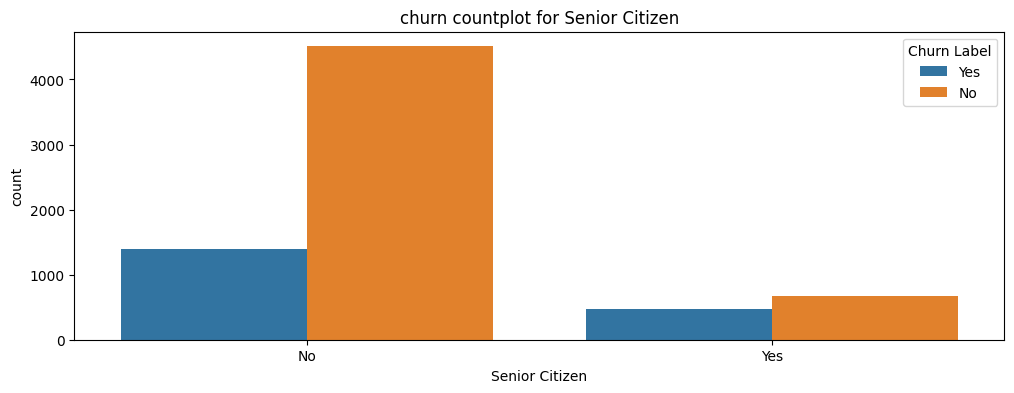

In [48]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list() + ['Senior Citizen']

for col in categorical_cols:
  plt.figure(figsize=(12, 4))
  sns.countplot(data=df, x=col, hue='Churn Label')
  plt.title(f'churn countplot for {col}')
  plt.show()


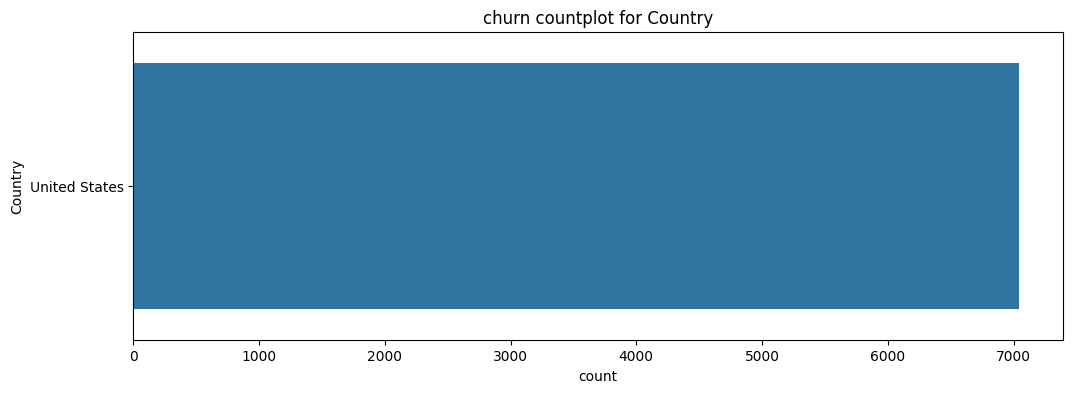

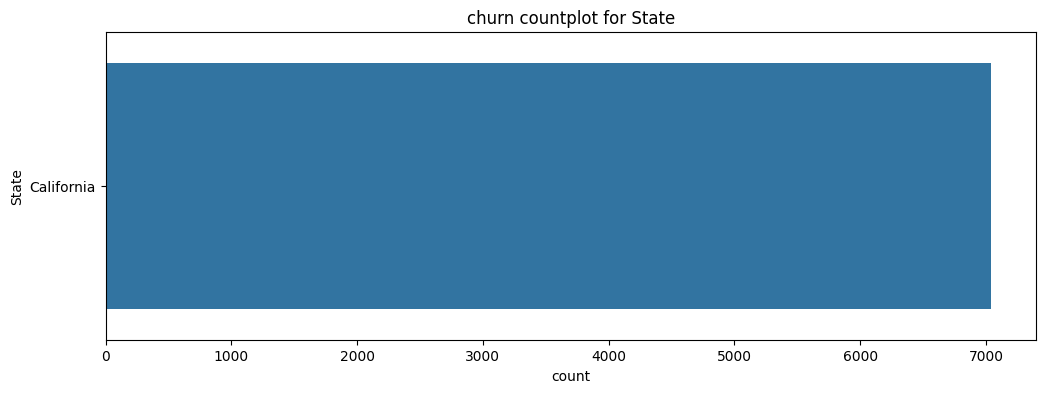

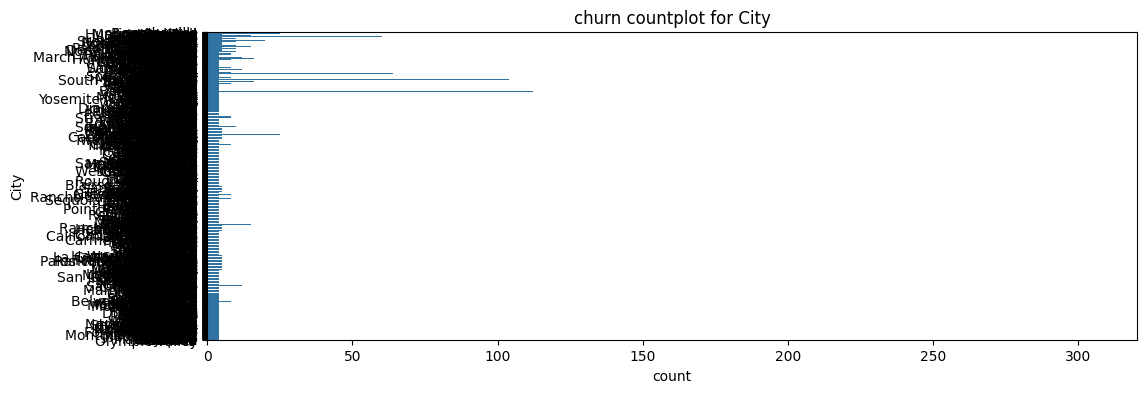

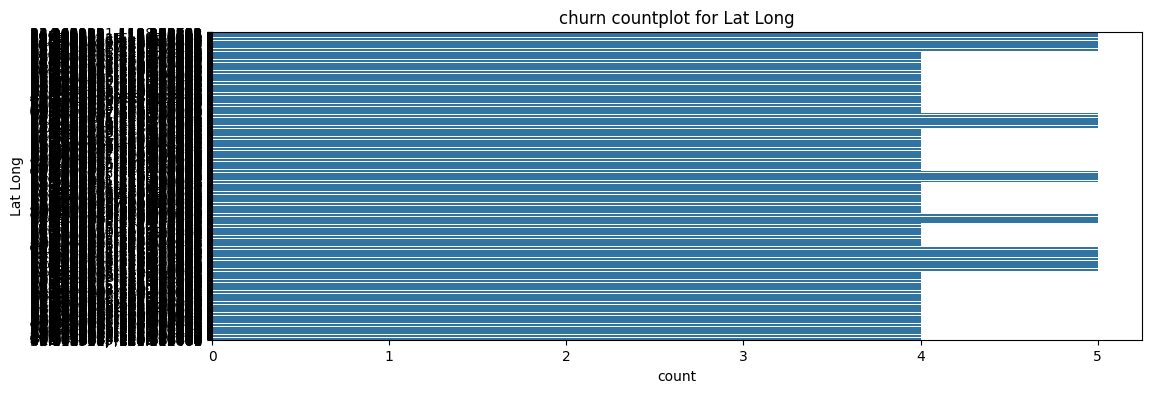

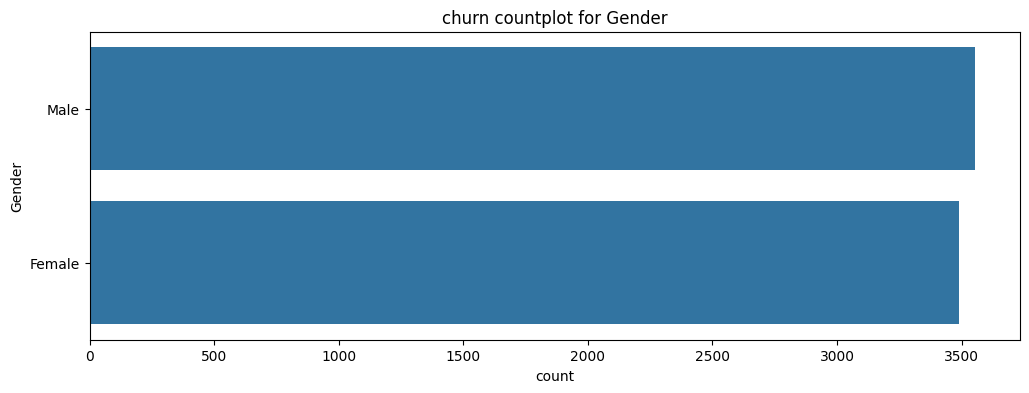

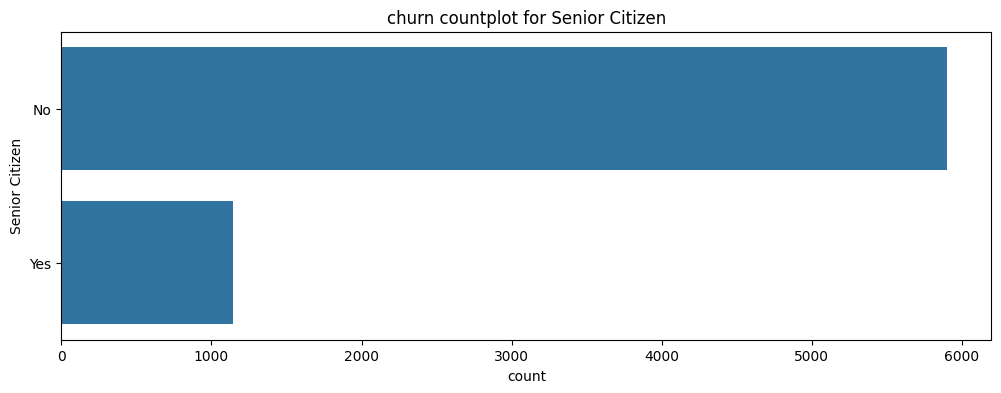

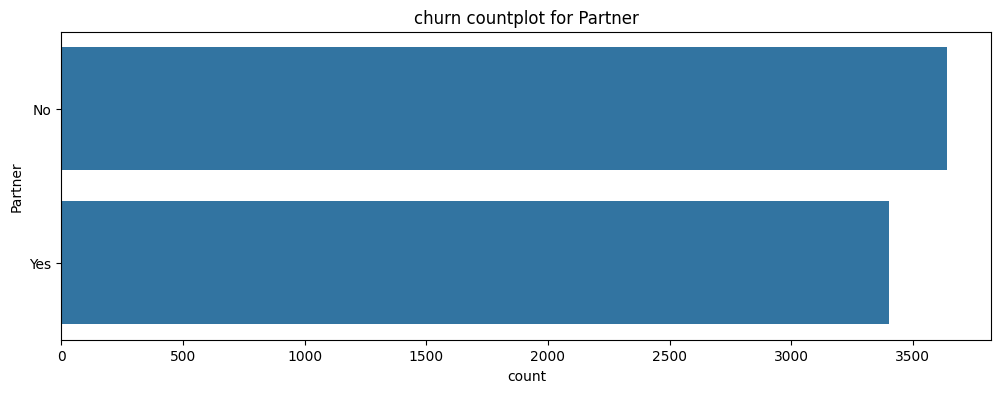

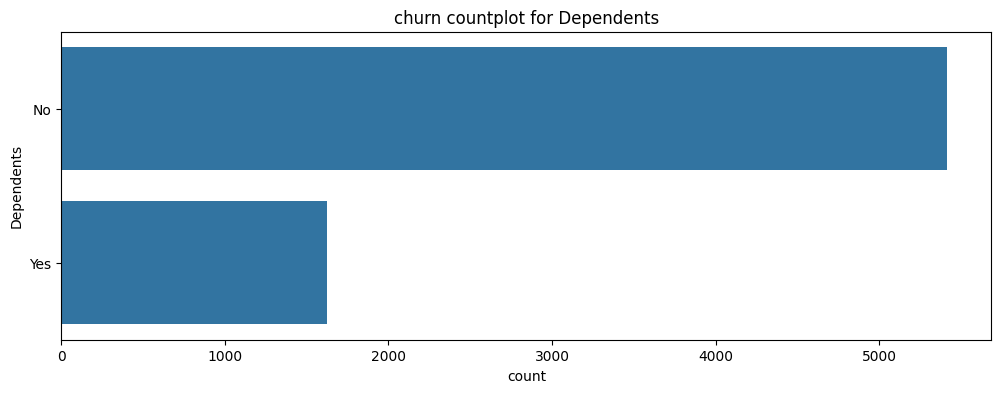

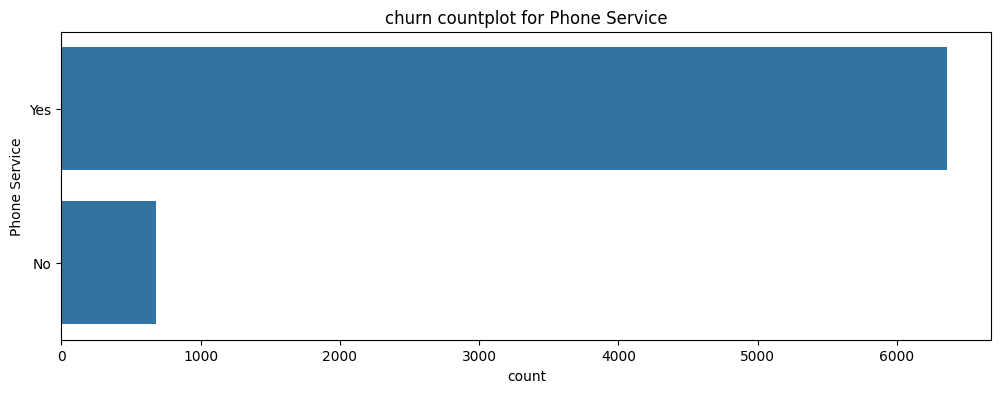

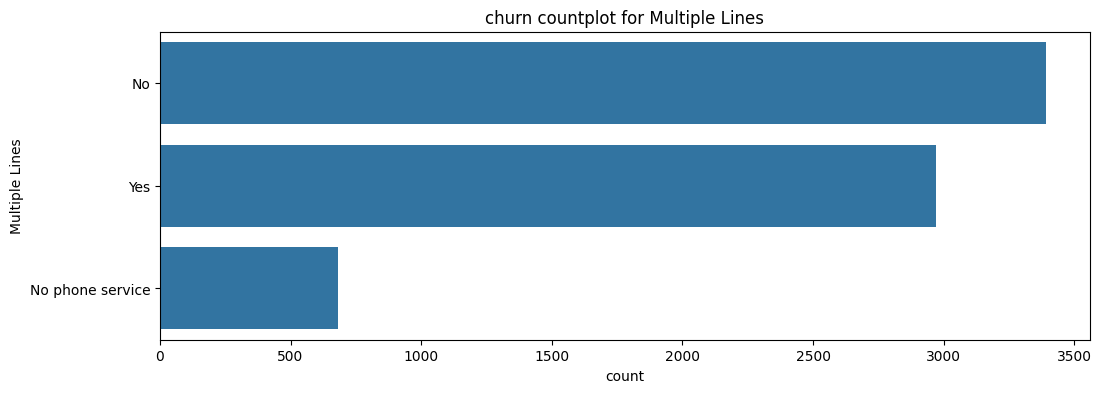

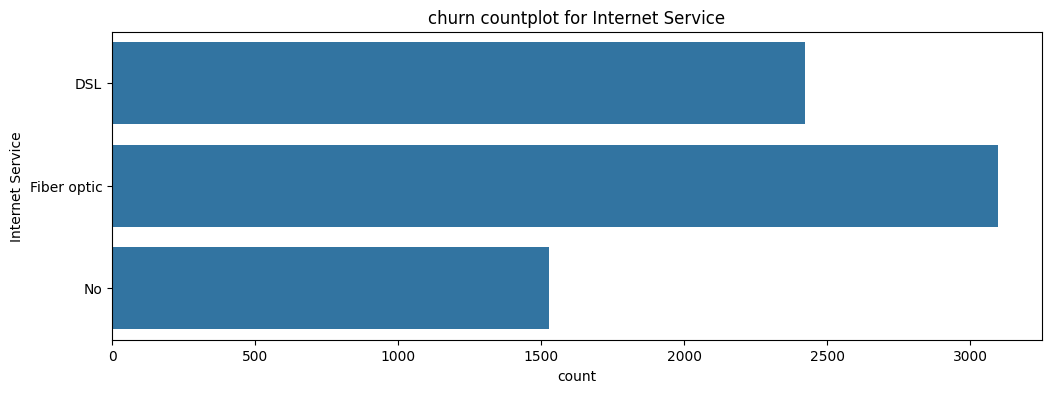

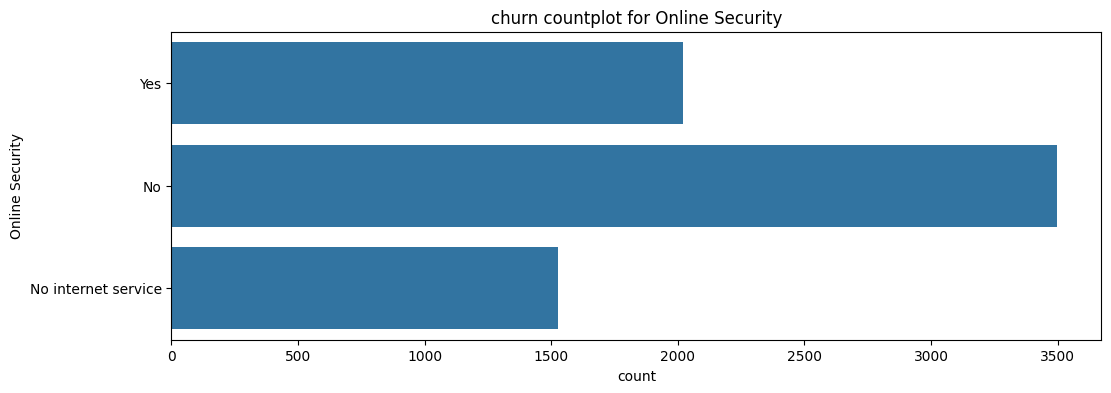

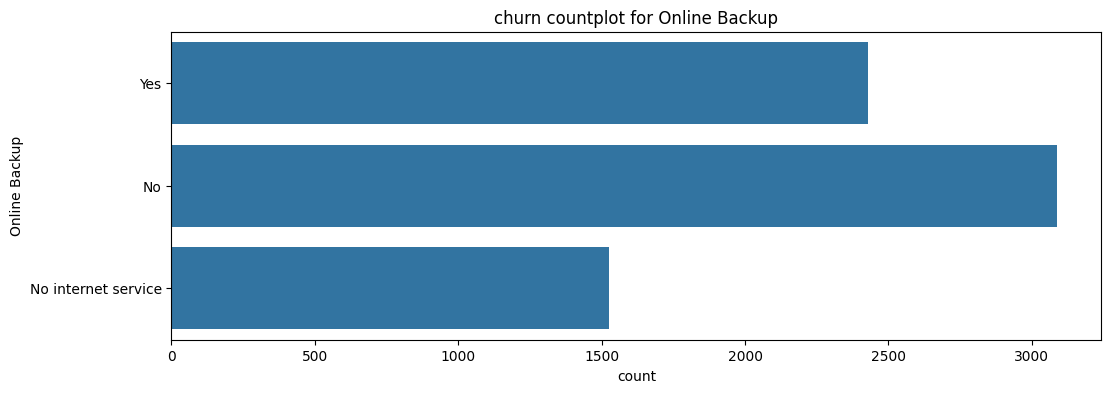

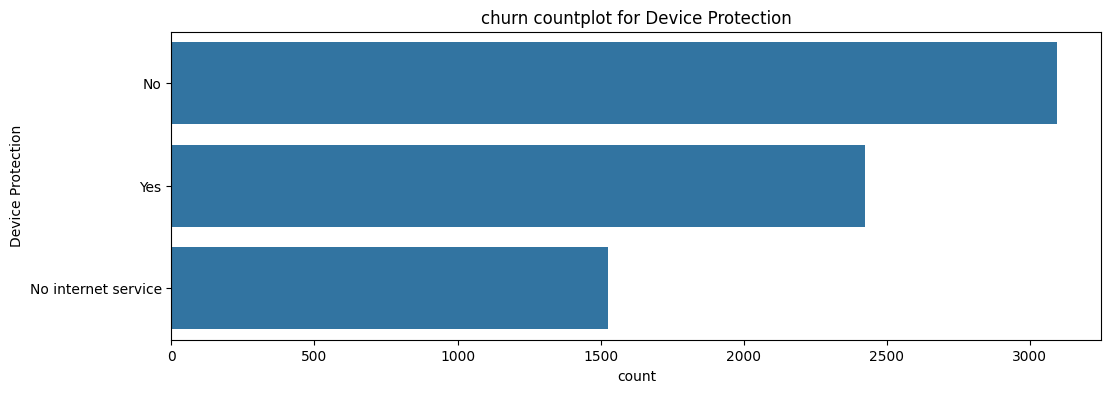

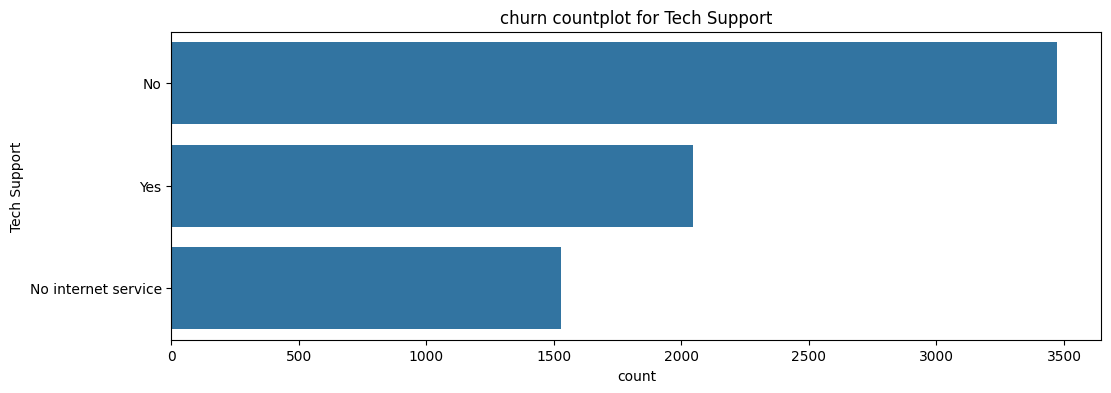

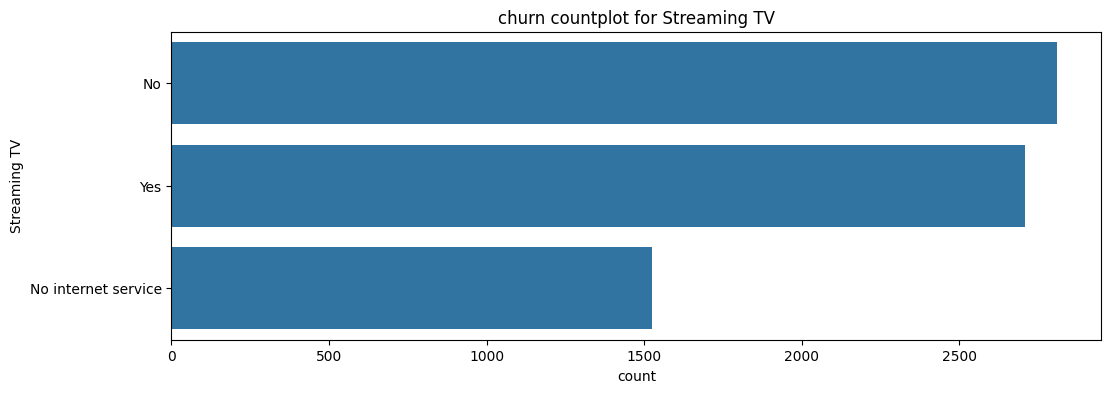

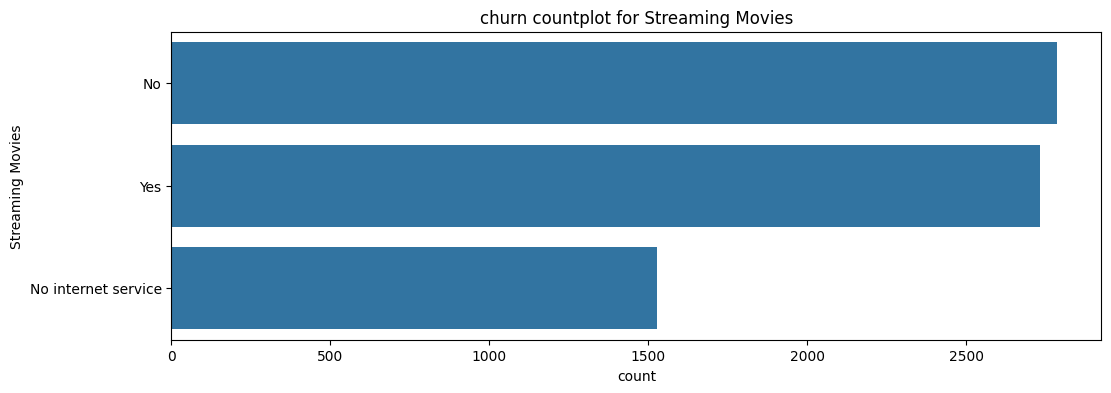

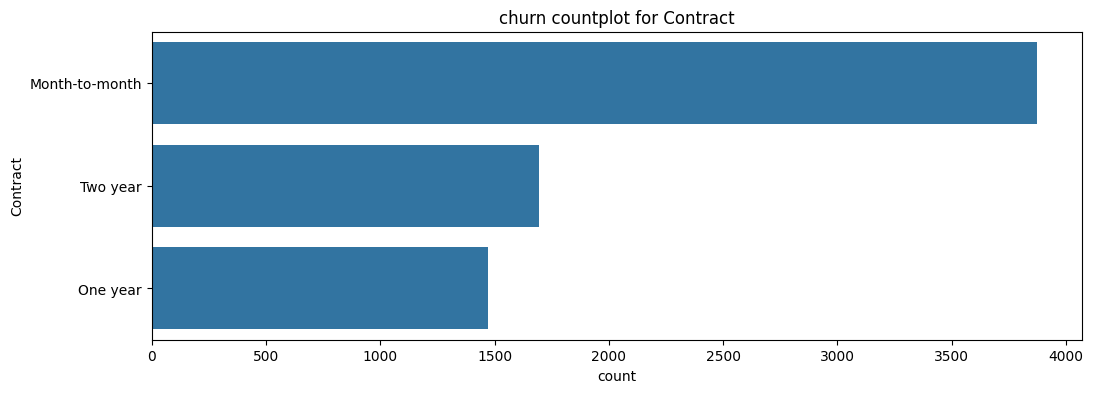

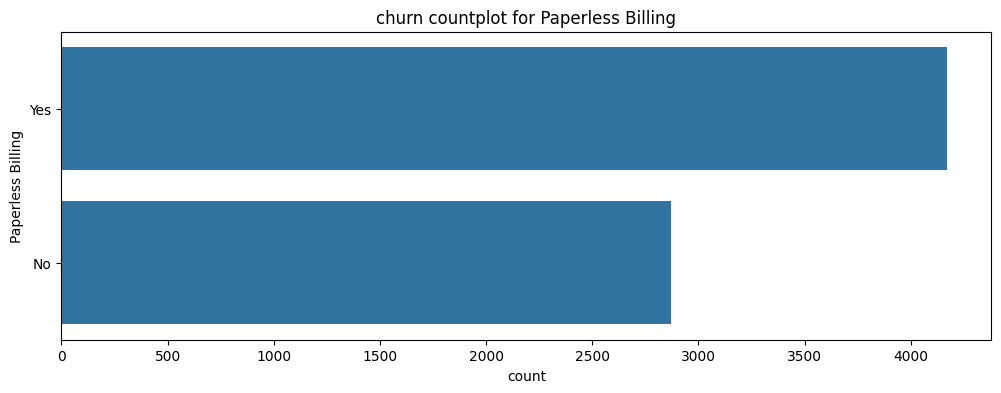

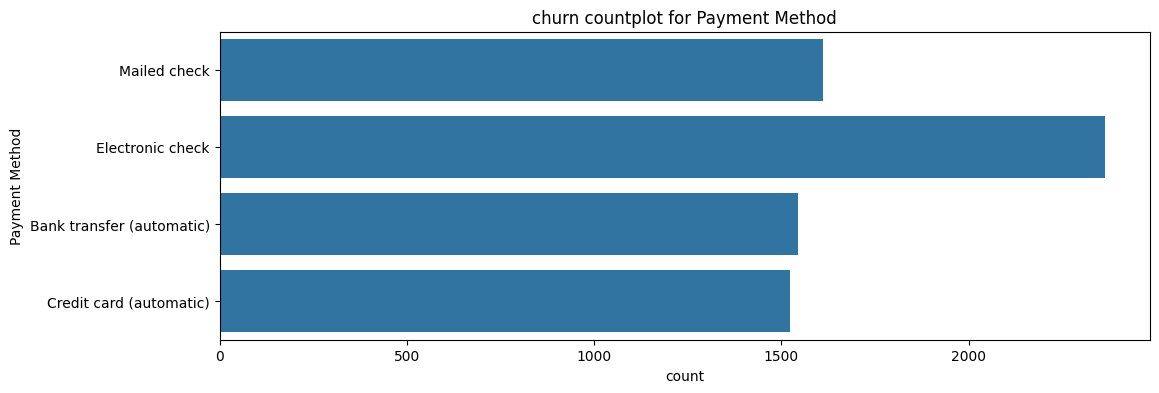

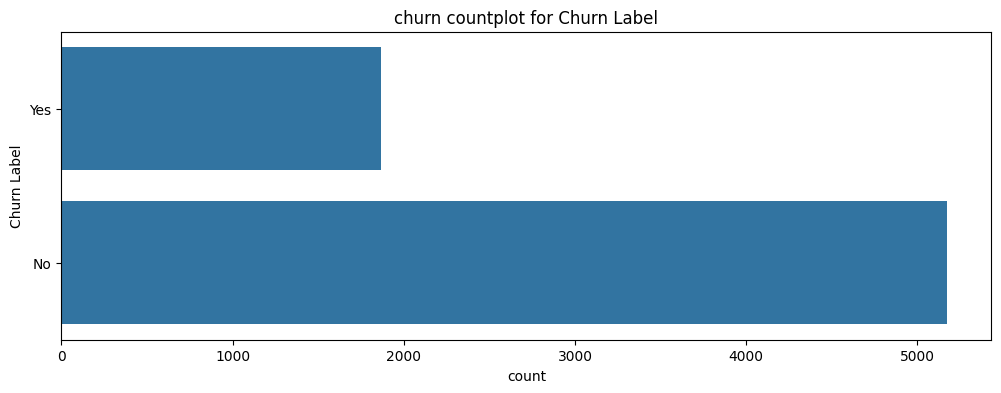

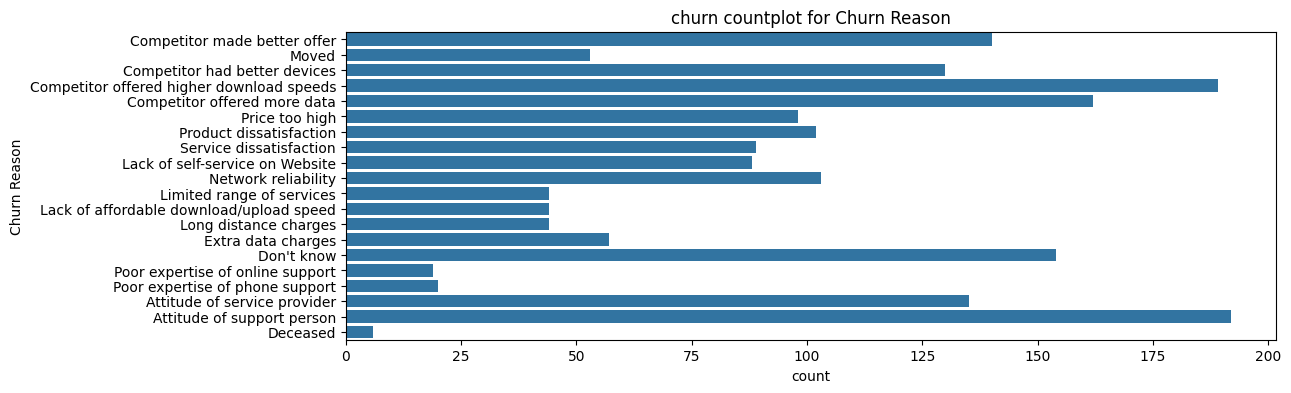

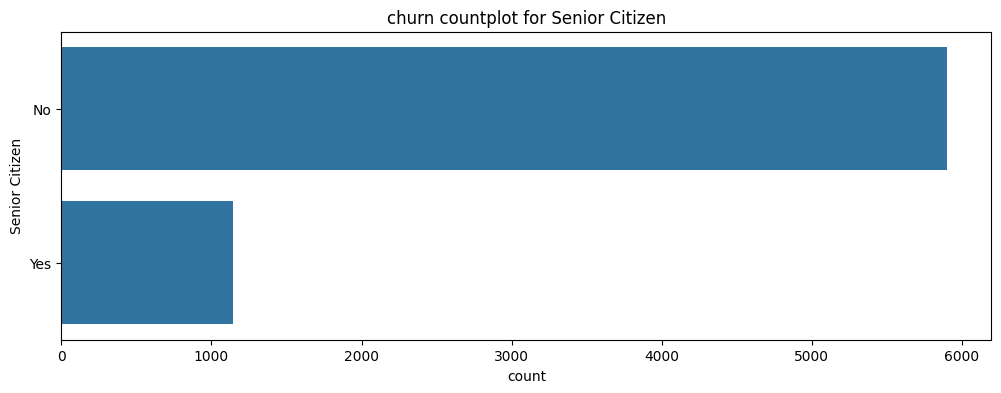

In [51]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list() + ['Senior Citizen']

for col in categorical_cols:
  plt.figure(figsize=(12, 4))
  sns.countplot(y=df[col])
  plt.title(f'churn countplot for {col}')
  plt.show()

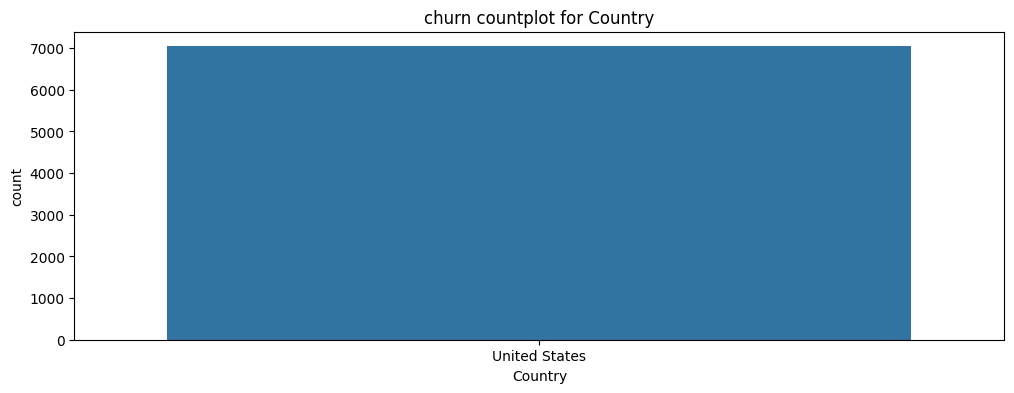

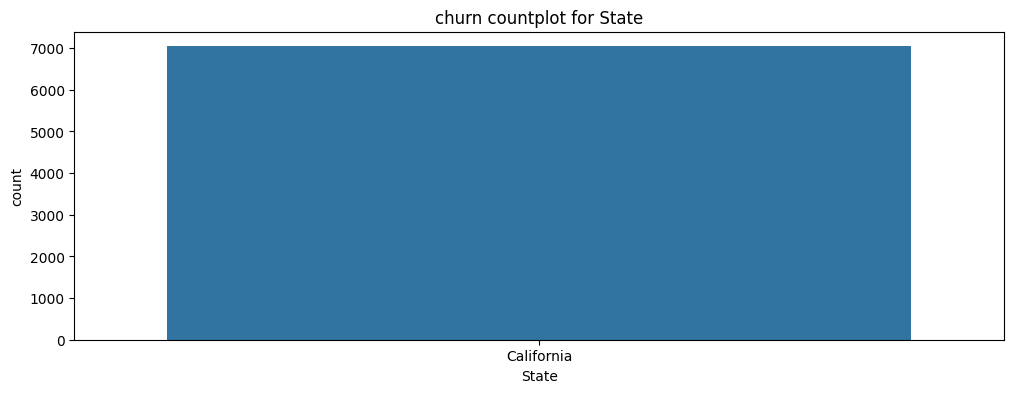

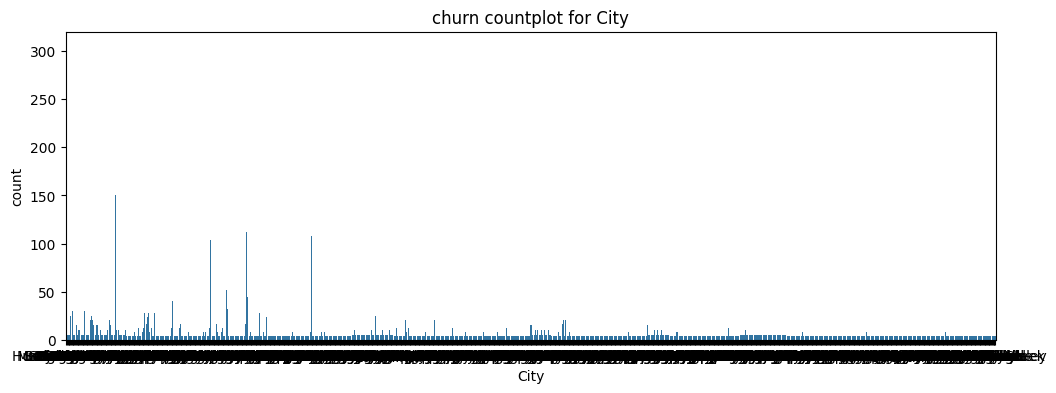

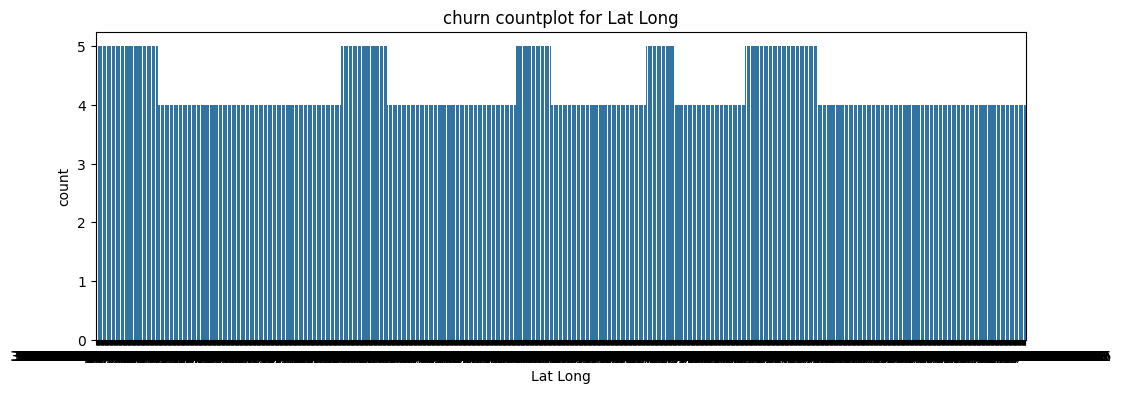

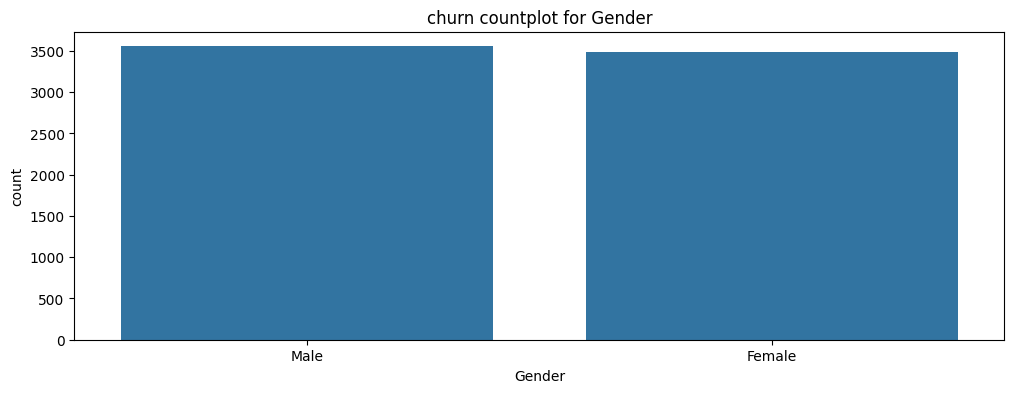

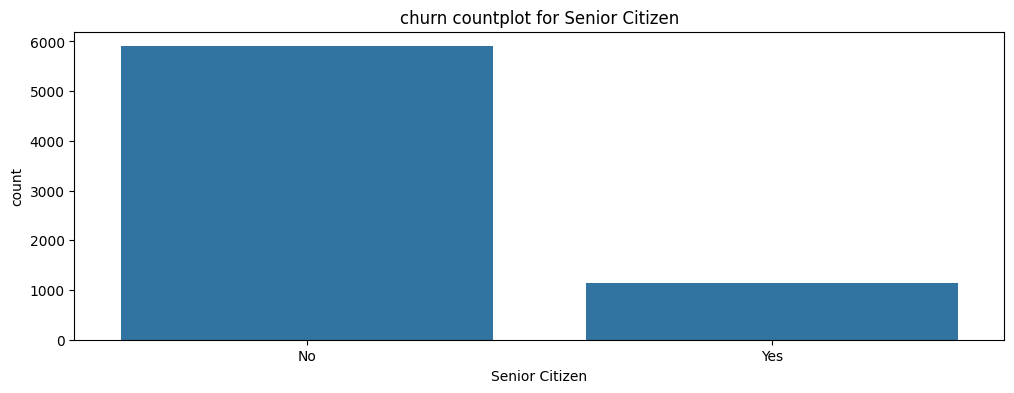

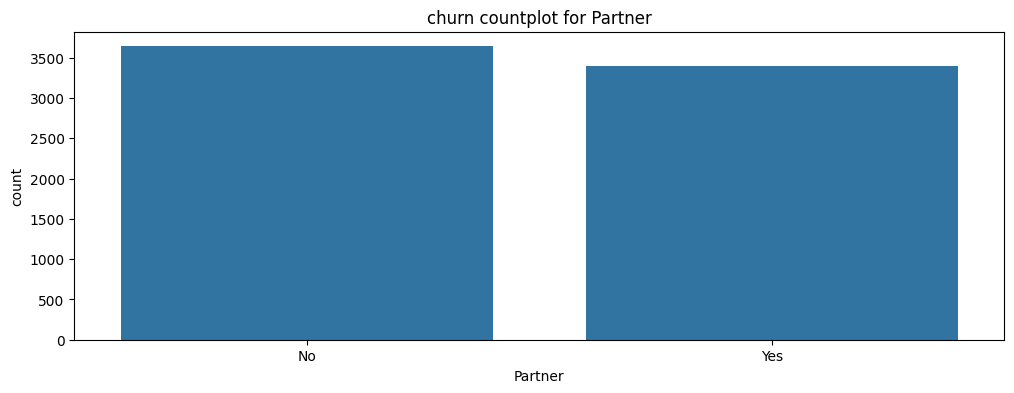

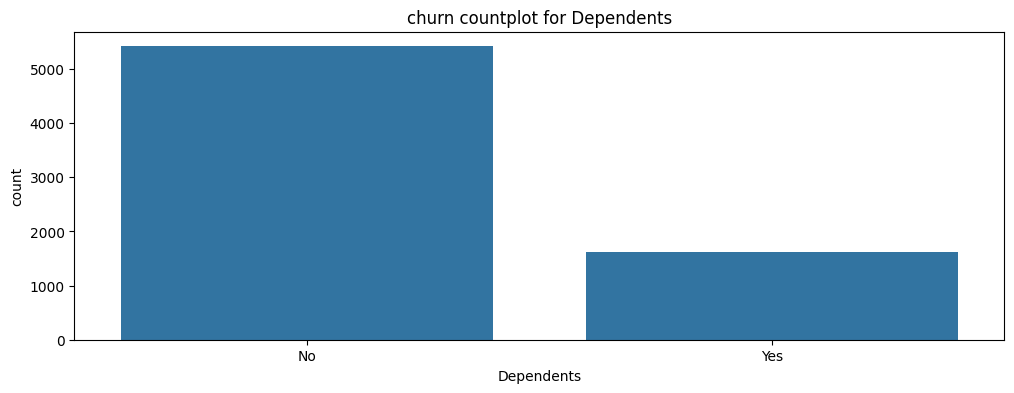

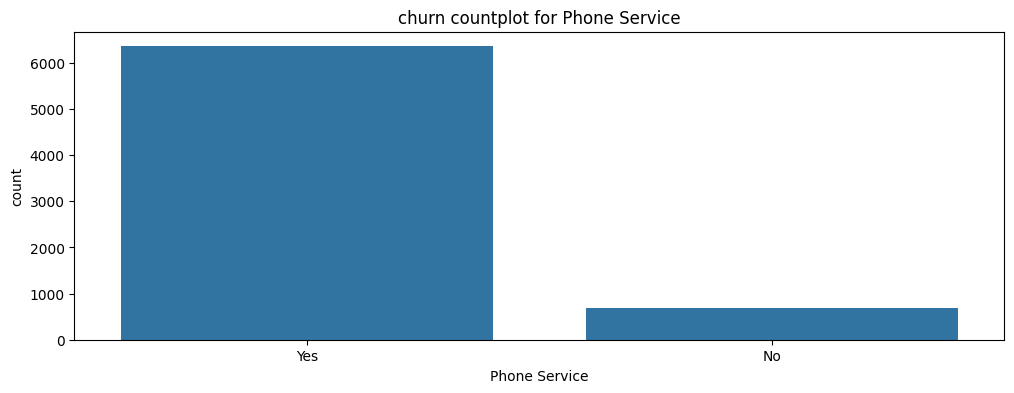

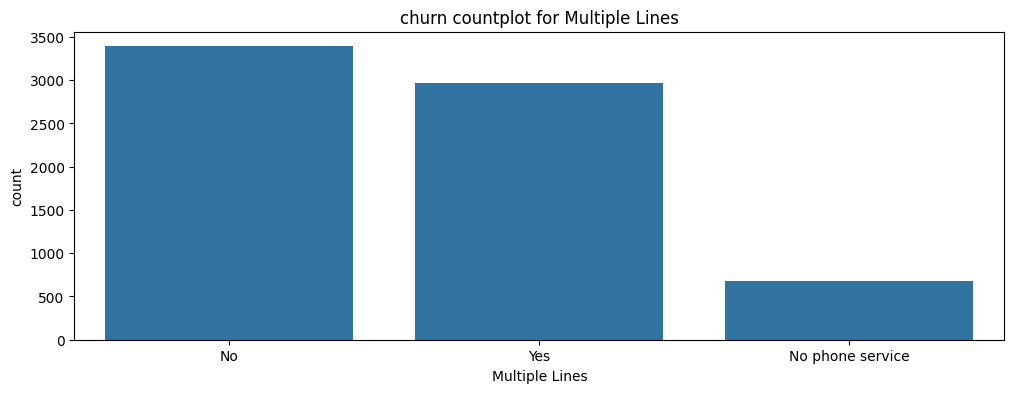

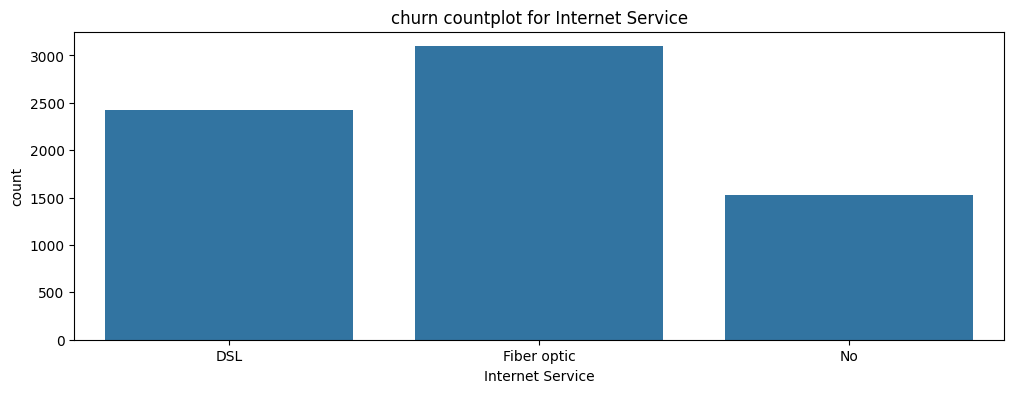

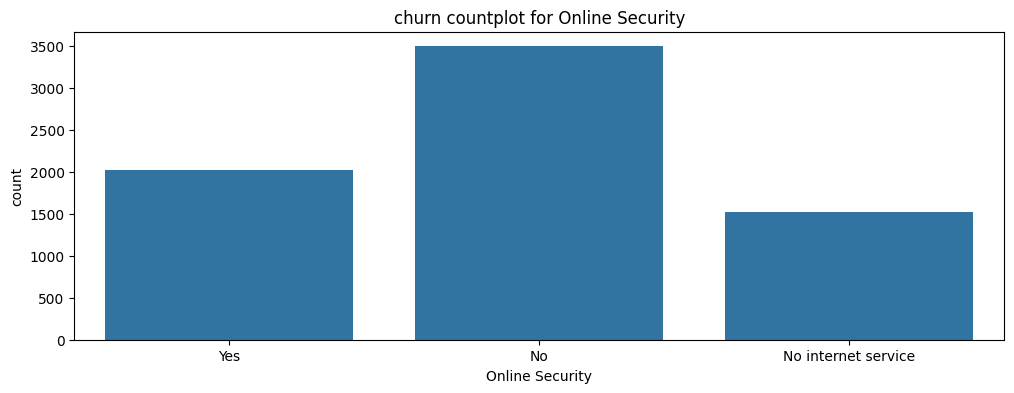

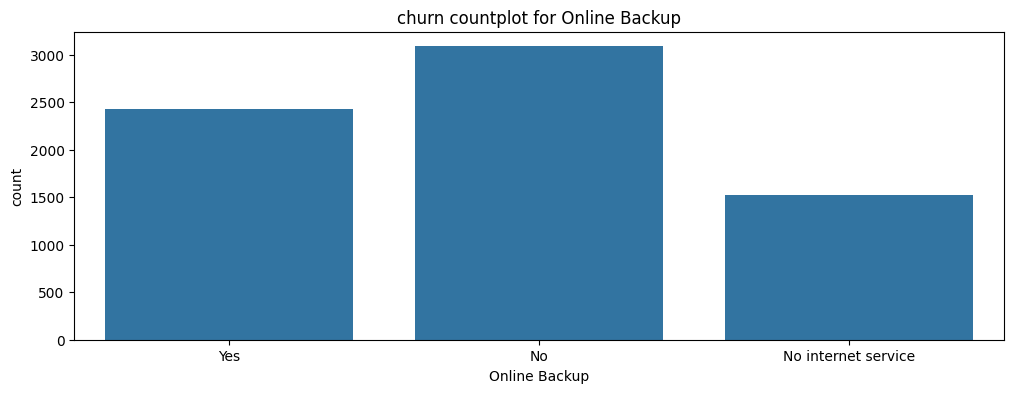

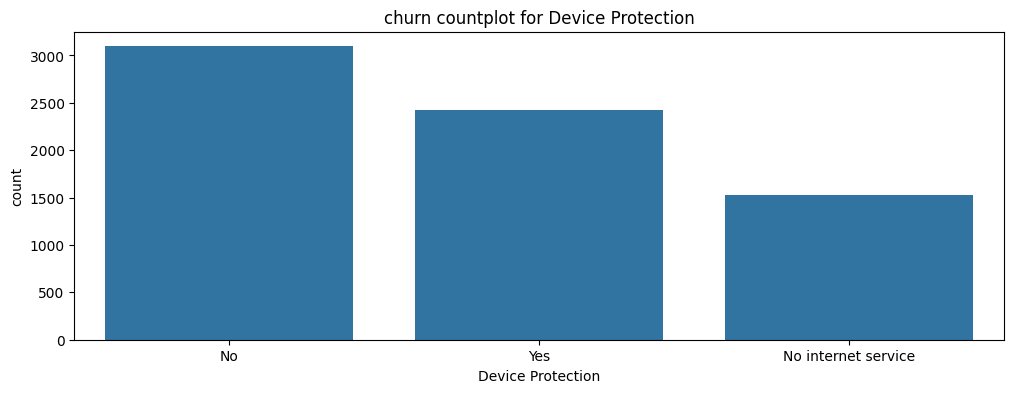

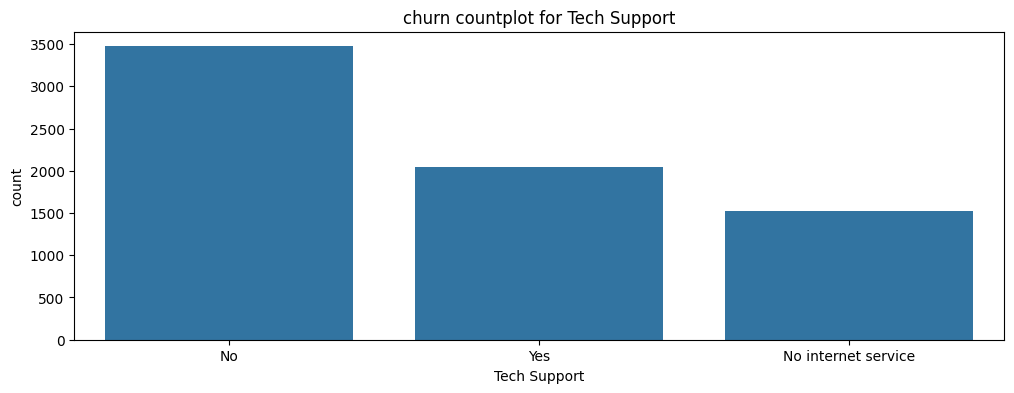

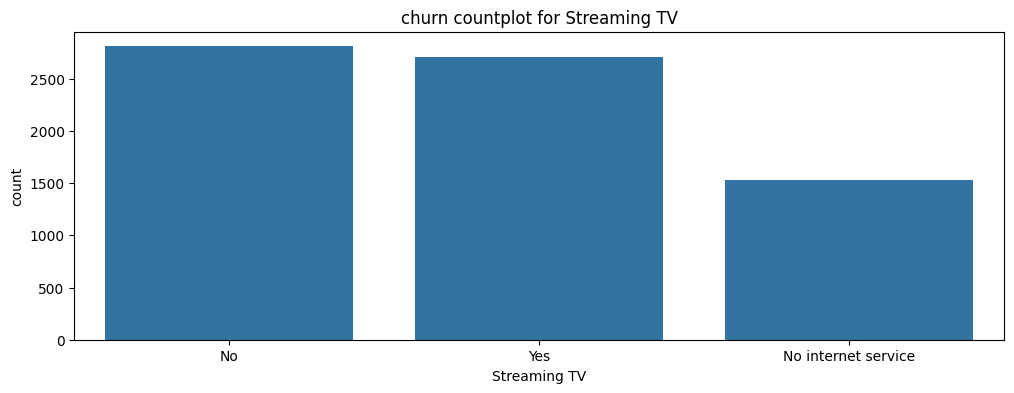

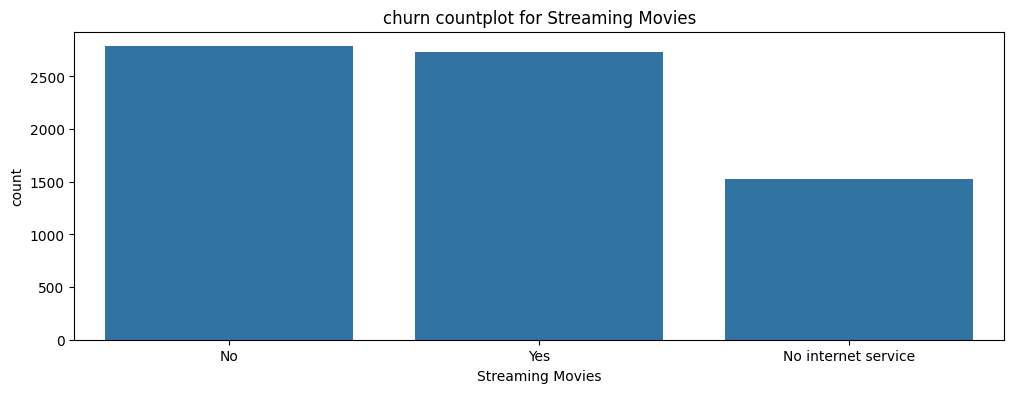

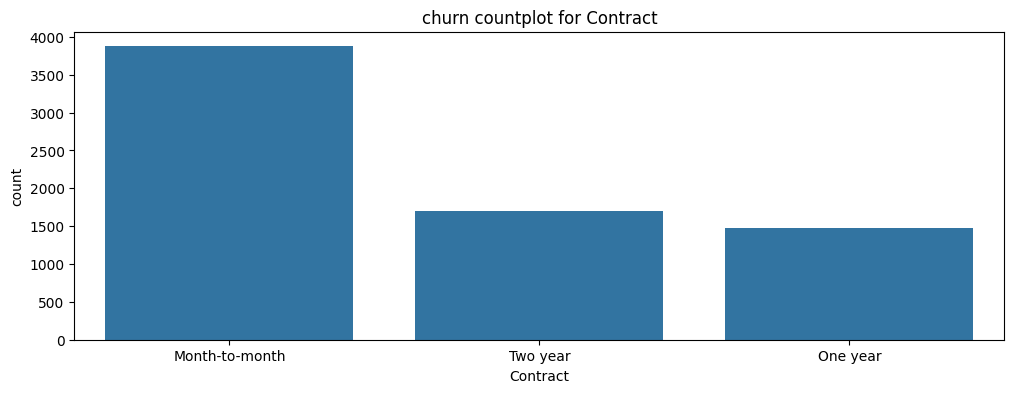

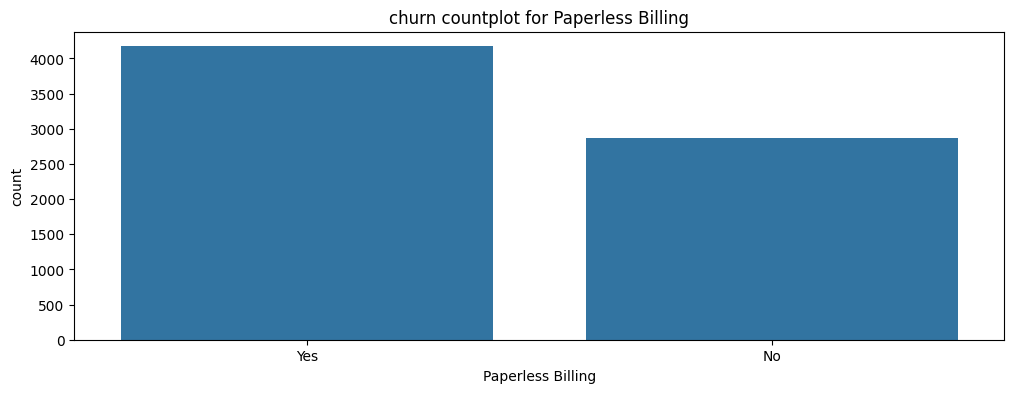

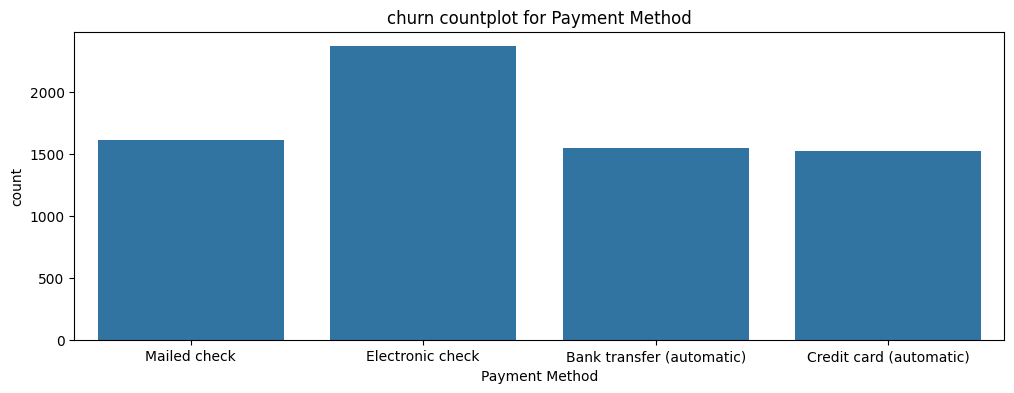

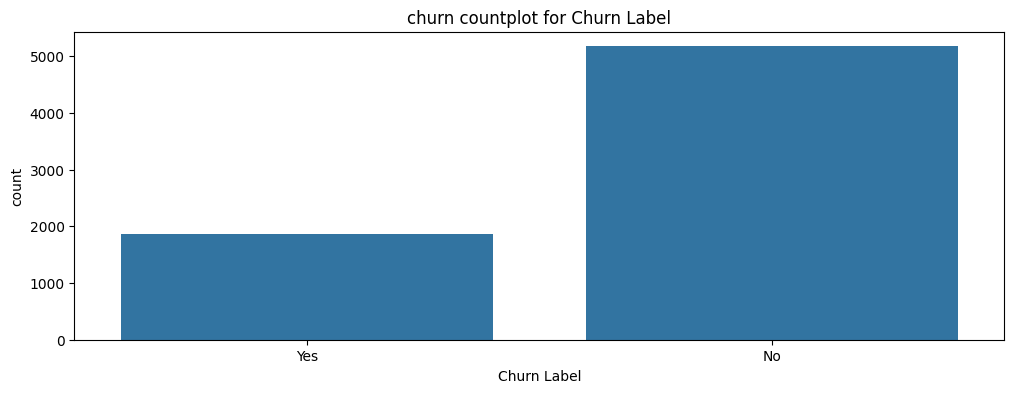

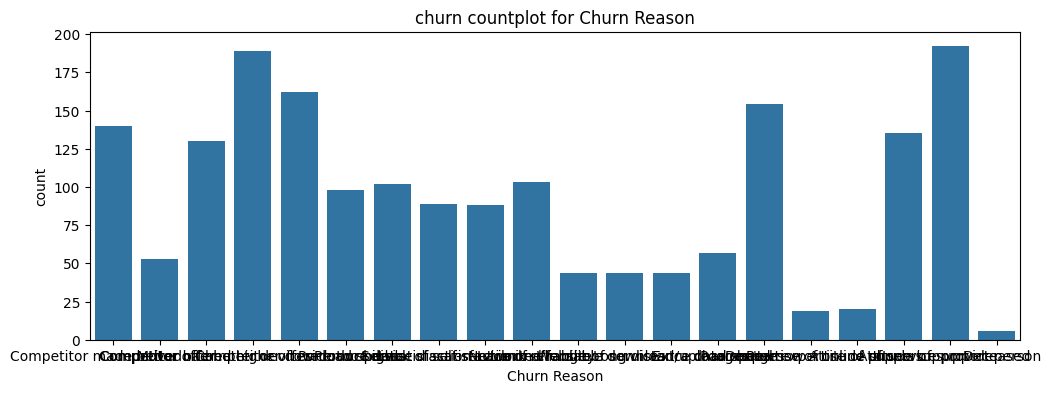

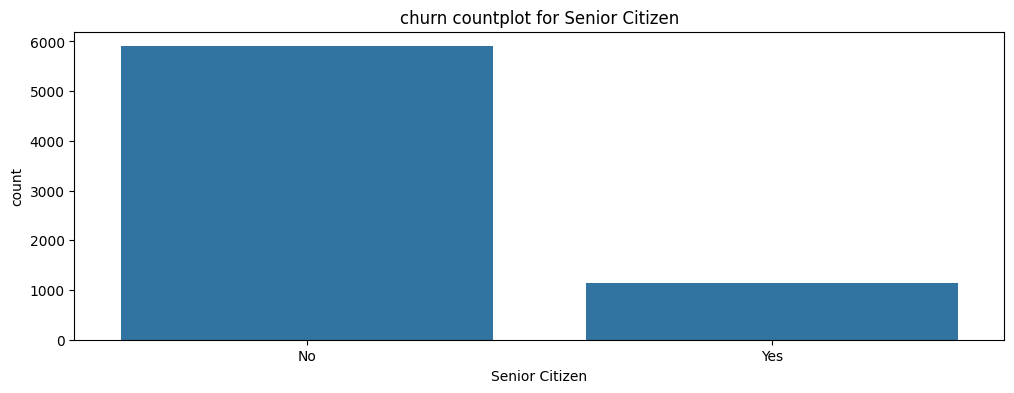

In [52]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list() + ['Senior Citizen']

for col in categorical_cols:
  plt.figure(figsize=(12, 4))
  sns.countplot(x=df[col])
  plt.title(f'churn countplot for {col}')
  plt.show()

## Label Encoding

In [53]:
df['Churn Label'] = df['Churn Label'].replace({"Yes": 1, "No": 0})

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

In [57]:
object_columns = df.select_dtypes(include=['object']).columns.to_list()
object_columns

['Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Reason']

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = {}

for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoder[column] = label_encoder

In [59]:
encoder

{'Country': LabelEncoder(),
 'State': LabelEncoder(),
 'City': LabelEncoder(),
 'Lat Long': LabelEncoder(),
 'Gender': LabelEncoder(),
 'Senior Citizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Phone Service': LabelEncoder(),
 'Multiple Lines': LabelEncoder(),
 'Internet Service': LabelEncoder(),
 'Online Security': LabelEncoder(),
 'Online Backup': LabelEncoder(),
 'Device Protection': LabelEncoder(),
 'Tech Support': LabelEncoder(),
 'Streaming TV': LabelEncoder(),
 'Streaming Movies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'Paperless Billing': LabelEncoder(),
 'Payment Method': LabelEncoder(),
 'Churn Reason': LabelEncoder()}

In [60]:
import pickle
with open('encoder.pkl', 'wb') as file:
  pickle.dump(encoder, file)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numerical_columns = ['Total Charges', 'Monthly Charges', 'Tenure Months']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])